In [65]:
## Problem:
# TikTok users have the ability to submit reports that identify videos and comments that contain user claims. 
# These reports identify content that needs to be reviewed by moderators. The process generates a large number of 
# user reports that are challenging to consider in a timely manner. 

# Objective 
# working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion. 
# With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

In [185]:
## Import Libraries
!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as ply
import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.utils import resample
# This is the classifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
import pickle

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [67]:
## import data set
Data = r'C:\Users\alikr\OneDrive\Desktop\Google certificate\Google advanced analytics\M1 Project\TikTok\tiktok_dataset.csv'
df = pd.read_csv(Data)

In [68]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [70]:
df.shape

(19382, 12)

In [71]:
df.size

232584

In [72]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


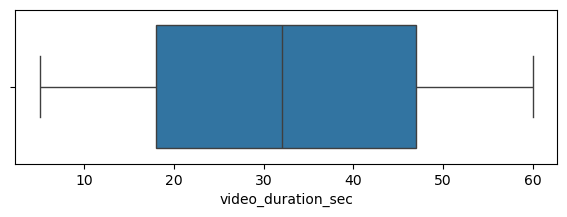

In [73]:
## Box plot for the durtation of the video
ply.figure(figsize=(7,2))

boxp1 = sns.boxplot(data = None, x=df['video_duration_sec'] )

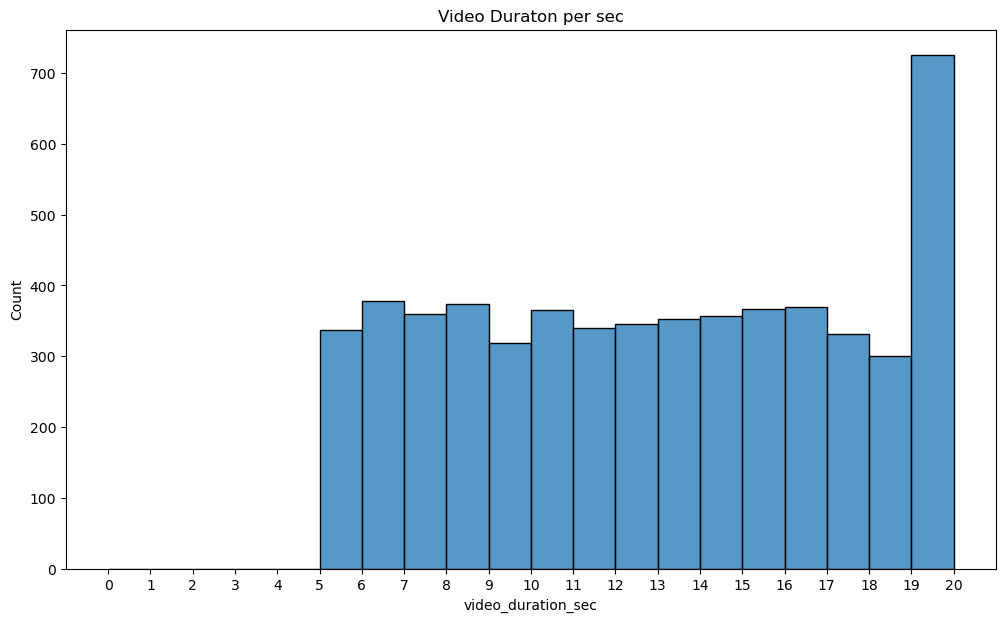

In [74]:
## histogram for the duration of the video

ply.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='video_duration_sec', bins=range(0,21,1), 
                 )
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
ply.title('Video Duraton per sec');

## the videos beginnat 5s, but we can see that the majority if them are between 19 -20 sec. unifform distribution

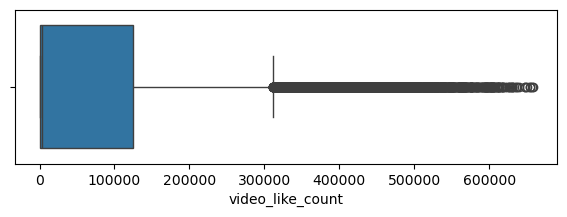

In [75]:
## Box plot for the Videos Liked
ply.figure(figsize=(7,2))

boxp1 = sns.boxplot(data = None, x=df['video_like_count'] )

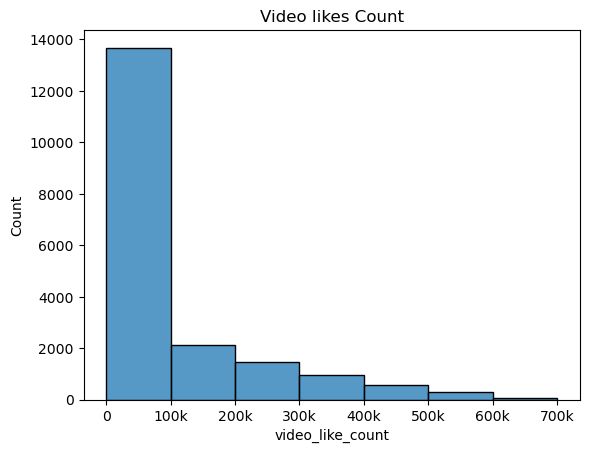

In [76]:
## histogram for the duration of the video

ax = sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)

ply.title('Video likes Count');

## from the boxplot we can see that there ia a lot of ouliters, right Skewed

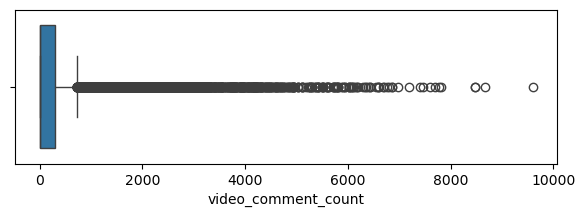

In [77]:
## Box plot for the Comment Count
ply.figure(figsize=(7,2))

boxp1 = sns.boxplot(data = None, x=df['video_comment_count'] )

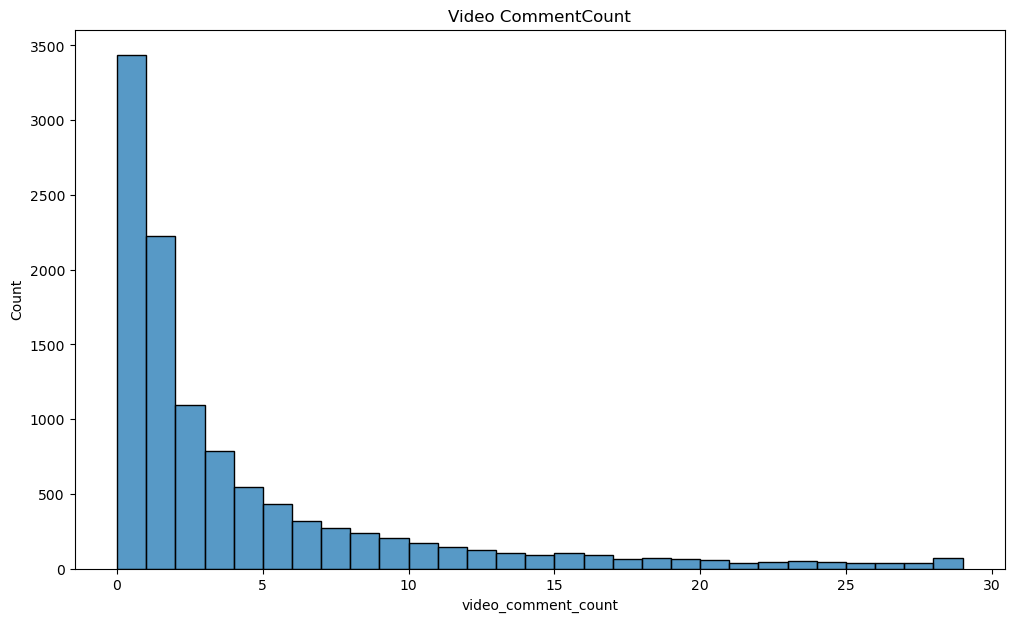

In [78]:
## histogram for the Comment count

ply.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='video_comment_count', bins=range(0,30,1))

ply.title('Video CommentCount');

### it is right skiwed the mojoity of them has 0 comments. A lot of outliers

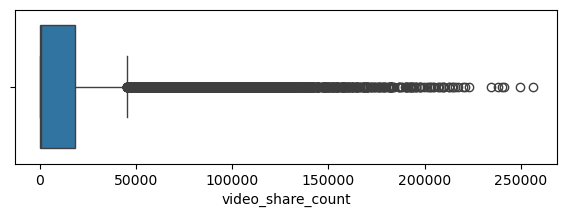

In [79]:
## Box plot for the share Count
ply.figure(figsize=(7,2))

boxp1 = sns.boxplot(data = None, x=df['video_share_count'] )

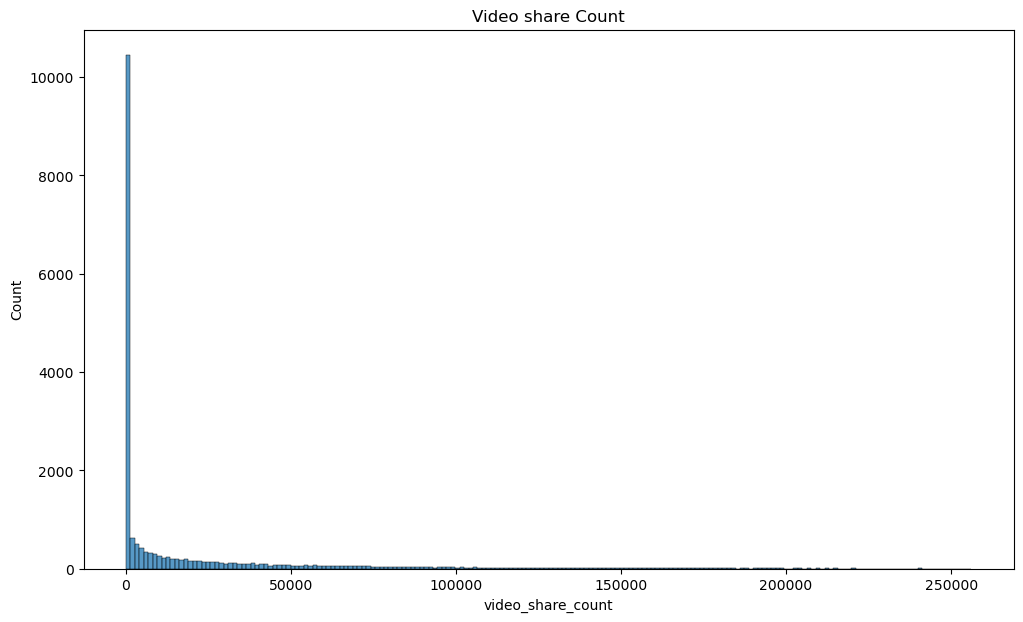

In [80]:
## histogram for the shares count

ply.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='video_share_count')

ply.title('Video share Count');

### it is right skiwed the mojoity of them has 0 comments. A lot of outliers

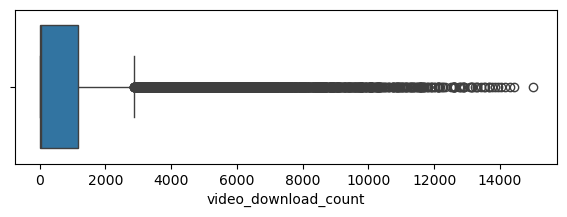

In [81]:
## Box plot for the Comment Count
ply.figure(figsize=(7,2))

boxp1 = sns.boxplot(data = None, x=df['video_download_count'] )

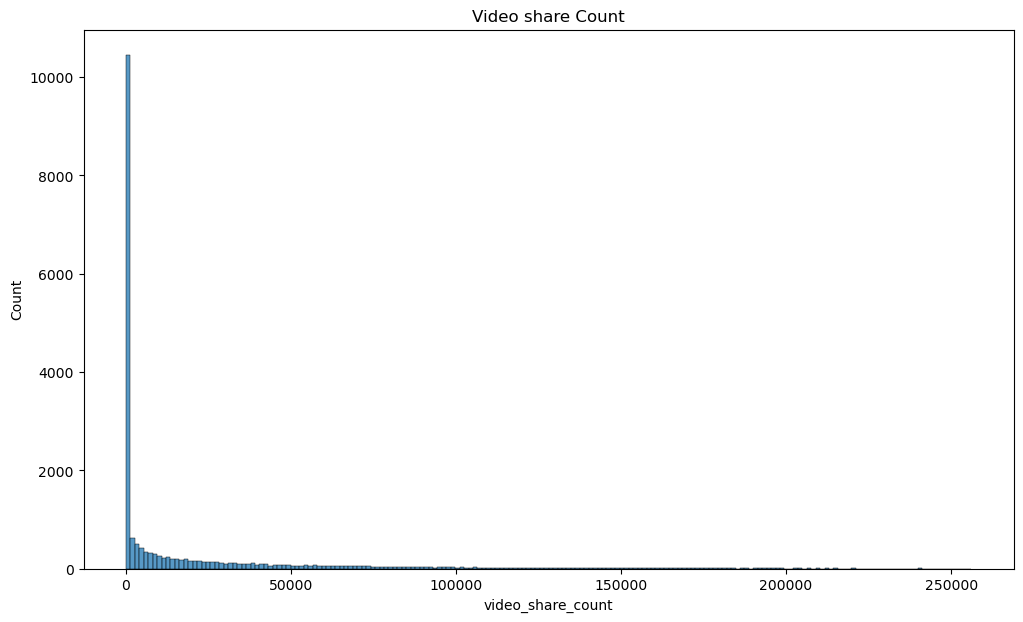

In [82]:
## histogram for the download count

ply.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='video_share_count')

ply.title('Video share Count');

### it is right skiwed the mojoity of them has 0 comments. A lot of outliers

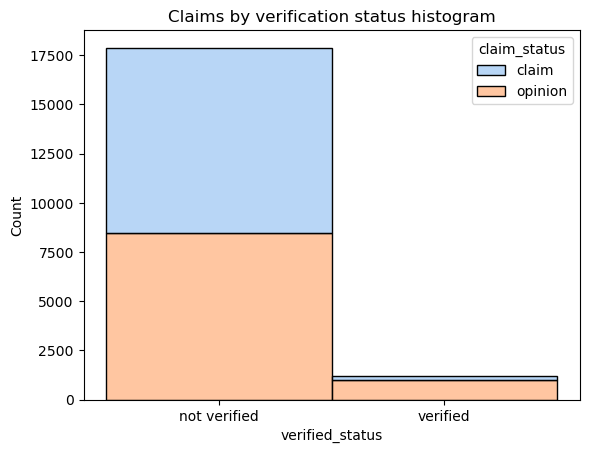

In [83]:
ax = sns.histplot(data=df, x='verified_status', 
                  hue='claim_status', 
                  multiple='stack',
                  palette='pastel')

ply.title('Claims by verification status histogram');

## the majority are unverified. if the uses is veryfied he is more likely to post an opinion.

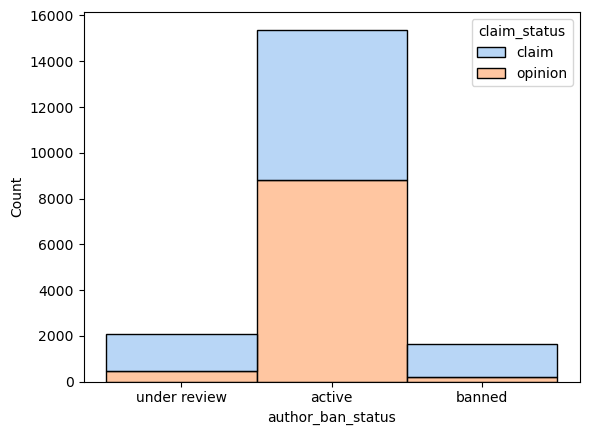

In [84]:
ax = sns.histplot(data=df, x='author_ban_status', 
                  hue='claim_status', 
                  multiple='stack',
                  palette='pastel')

## There is a lot of activr useds than banned, we notice tht for banned the majority are claims rater than active which is opinion.

In [85]:
Median_view_couhnt = df.groupby('author_ban_status')['video_view_count'].median()
df2 = pd.DataFrame(Median_view_couhnt)
df2.head()

,video_view_count
author_ban_status,
active,8616.0
banned,448201.0
under review,365245.5


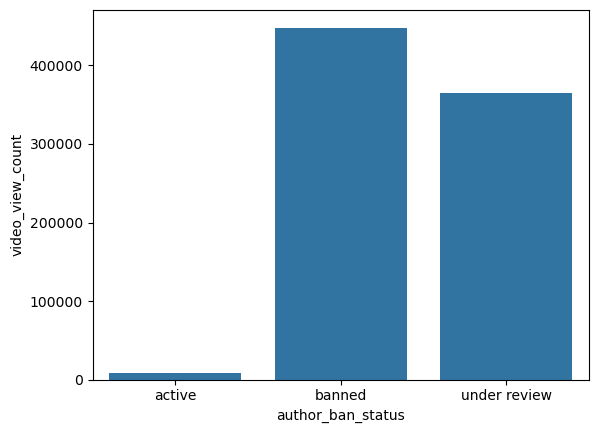

In [86]:
df2 = pd.DataFrame(Median_view_couhnt)
boxp = sns.barplot(x = df2.index, y = 'video_view_count', data = df2)

## number of non active are way more tham the active ones we knwe that the nonactive users are more likely to post
## a claim. Good variable to use is video_view_count

In [87]:
df.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

In [88]:
count_total_views = df.groupby('claim_status')['video_view_count'].sum()
df2 = pd.DataFrame(count_total_views)
df2.head()

,video_view_count
claim_status,
claim,4.813891e+09
opinion,4.696715e+07


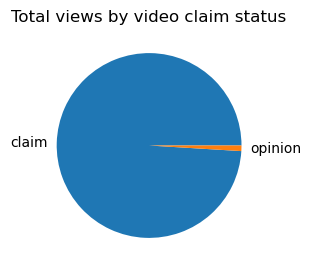

In [89]:
fig = ply.figure(figsize=(3,3))
ply.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
ply.title('Total views by video claim status');

In [90]:
##

count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]
for i in count_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    median = df[i].median()
    outlier_threshold = median + 1.5*iqr
    
    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[i] > outlier_threshold).sum()
    print(f'Number of outliers, {i}:', outlier_count)
    

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


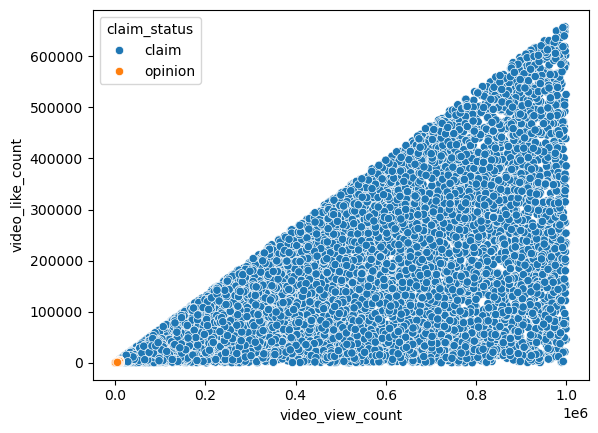

In [91]:
plot = sns.scatterplot(x = df['video_view_count'], y = df['video_like_count'], hue = df['claim_status'])

<Axes: xlabel='video_view_count', ylabel='video_like_count'>

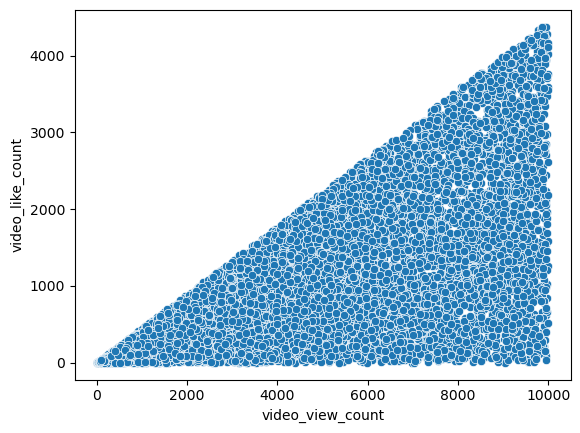

In [92]:
opinion = df[df['claim_status'] == 'opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"])

In [93]:
# I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. 
# I analyzed correlations between variables, particularly between the claim_status variable and others.

# I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also,
# I want to consider other variables that might be helpful in understanding the data

# The TikTok data team seeks to develop a machine learning model to assist in the classification of claims for user submissions.
# In this part of the project, the data team will conduct a hypothesis test to analyze the relationship between verified_status and video_view_count

In [94]:
## reasech question: we need to determine whether there is a statistical sig diffrence between the number if views 
## for tiktok by verfified and unverified accounts

In [191]:
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0,127
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0,95
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0,99
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0,103
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0,102


In [97]:
## Data Cleaning
## checking for NAs
print(df.isnull().sum().sum())

## we have 2086 NA values

2086


In [98]:
df.dropna(axis=0)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [99]:
# 𝐻0: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted 
# by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

# 𝐻𝐴: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted 
# by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).



## Sig level = 5%

not_verified = df[df['verified_status'] == 'not verified']['video_view_count']
verified = df[df['verified_status'] == 'verified']['video_view_count']

In [100]:
stats.ttest_ind(a=not_verified, b=verified , equal_var=False)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [101]:
## since the pvaluse  is very small -> we reject the null hypothesis -> there is a statistical sig in mean video count between verified and not verified 
# users

In [102]:
# built a logistic regression model to predict whether statements are claims or opinions within submissions, 
# based on the ‘verified_status’ variable within the claims dataset.

In [103]:
Data = r'C:\Users\alikr\OneDrive\Desktop\Google certificate\Google advanced analytics\M1 Project\TikTok\tiktok_dataset.csv'
df = pd.read_csv(Data)

In [104]:
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [105]:
df.shape

(19382, 12)

In [106]:
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [108]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [109]:
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [110]:
df = df.dropna(axis = 0)

In [111]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [112]:
df.duplicated().sum()
# no dups

0

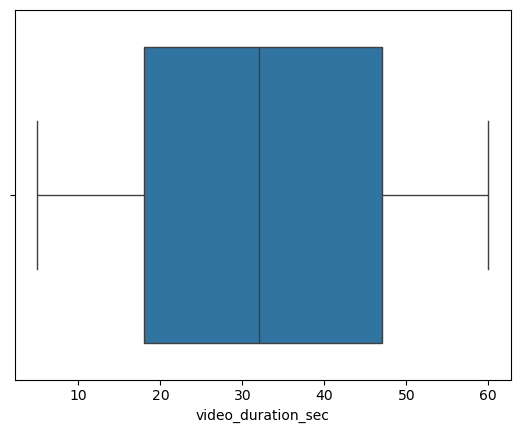

In [113]:
boxp1 = sns.boxplot(data = None, x=df['video_duration_sec'] )

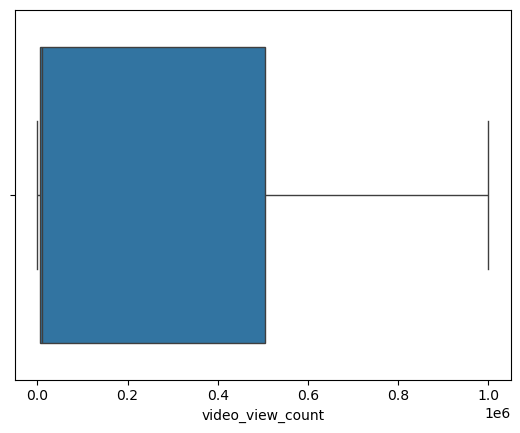

In [114]:
boxp2 = sns.boxplot(data = None, x=df['video_view_count'] )

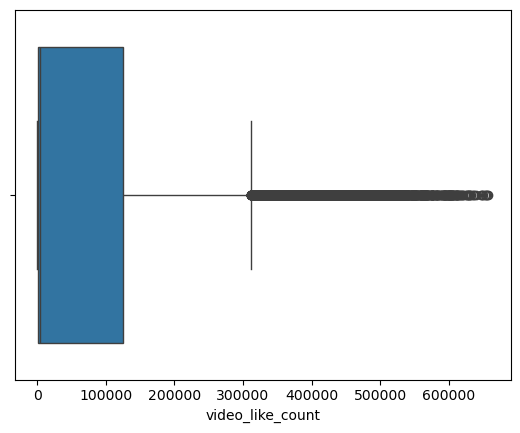

In [115]:
boxp2 = sns.boxplot(data = None, x=df['video_like_count'] )

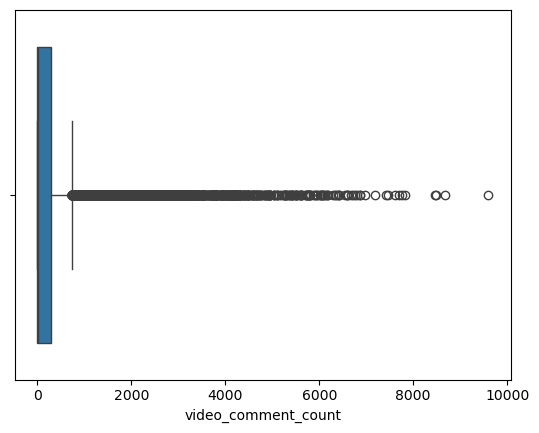

In [116]:
boxp2 = sns.boxplot(data = None, x=df['video_comment_count'] )

In [117]:
## for the variable video like count we can deduce from the box plot thar we have a lot of outliers.

In [118]:
# Check class balance
df["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [119]:
df['video_transcription_text_length'] = df['video_transcription_text'].str.len()
avg = df.groupby('claim_status')['video_transcription_text_length'].mean()
avg

claim_status
claim      95.376978
opinion    82.722562
Name: video_transcription_text_length, dtype: float64

In [120]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = df[df["verified_status"] == "not verified"]
data_minority = df[df["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts')

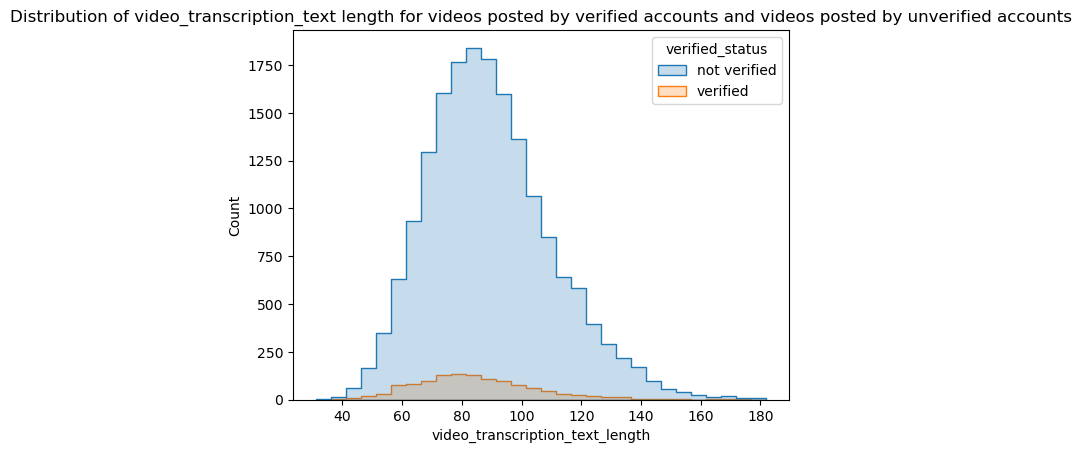

In [121]:
ax = sns.histplot(data=df, x='video_transcription_text_length', hue='verified_status', bins=30, kde=False, element="step", stat="count")
ply.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")

## from the boxplot we can condude that the more the words the less the person is verified

In [122]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
video_transcription_text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


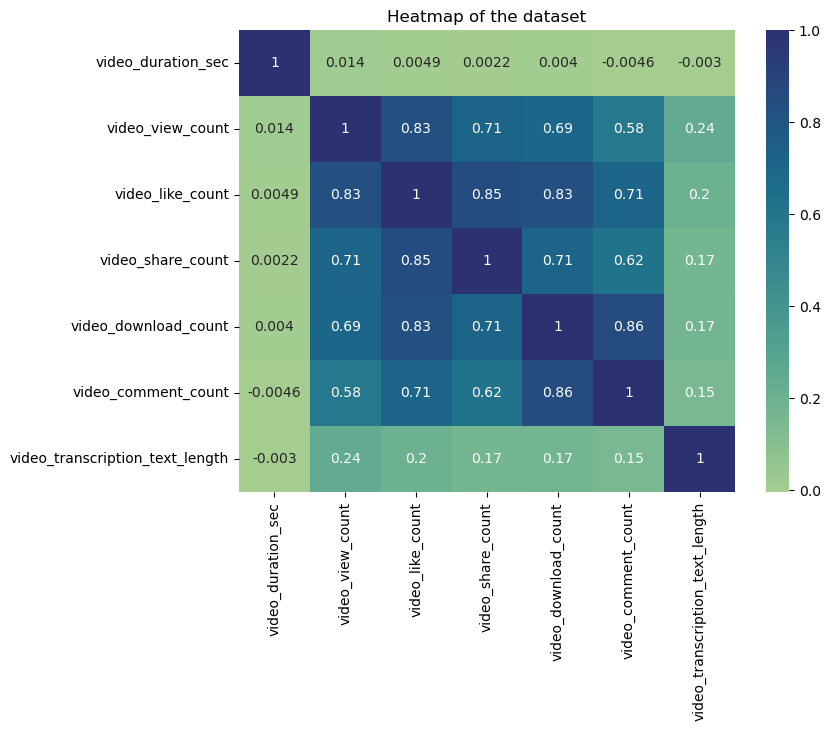

In [123]:
# Create a heatmap to visualize how correlated variables are
ply.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "video_transcription_text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
ply.title("Heatmap of the dataset")
ply.show()

## video_view_count and video_like_count are corelated

In [124]:
# Select outcome variable
y = data_upsampled["verified_status"]

# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()


,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [126]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [127]:
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [128]:
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [129]:
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [130]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [134]:
# dummy
X_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [136]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [138]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [140]:
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [142]:
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [144]:
y_train.dtype

dtype('O')

In [146]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [148]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [150]:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

In [152]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [154]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [156]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [158]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [160]:
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,1789.0,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,3413.0,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [162]:
y_pred = log_clf.predict(X_test_final)

In [164]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [166]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

In [168]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

In [170]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

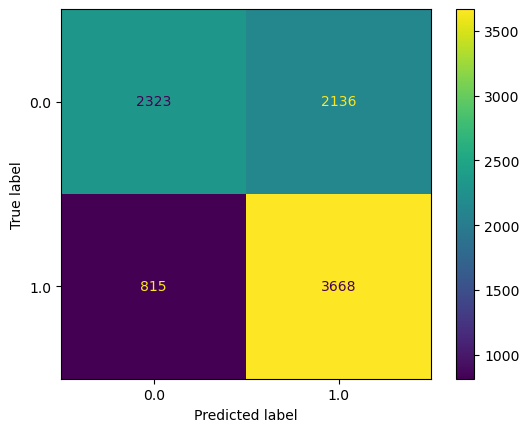

In [176]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
ply.show()

In [178]:
# # he upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts 
# that the model accurately classified as so.

# # The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts 
# that the model misclassified as posted by verified accounts.

# # The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts 
#     that the model misclassified as posted by unverified accounts.

# # The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts 
#     that the model accurately classified as so.

# # A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [187]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



In [189]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.415410e-03
1,video_view_count,-8.059986e-08
2,video_share_count,4.721132e-06
3,video_download_count,-1.737109e-04
4,video_comment_count,3.297250e-04
5,claim_status_opinion,1.635816e+00
6,author_ban_status_banned,-4.399043e-01
7,author_ban_status_under review,-1.097843e-01


In [201]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [271]:
# The goal of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".

## class check
df['claim_status'].value_counts(normalize=True)

## from the below we can say that the outcome is balanced.

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

In [273]:
df['len_text'] = df['video_transcription_text'].apply(len)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   #                                19084 non-null  int64  
 1   claim_status                     19084 non-null  object 
 2   video_id                         19084 non-null  int64  
 3   video_duration_sec               19084 non-null  int64  
 4   video_transcription_text         19084 non-null  object 
 5   verified_status                  19084 non-null  object 
 6   author_ban_status                19084 non-null  object 
 7   video_view_count                 19084 non-null  float64
 8   video_like_count                 19084 non-null  float64
 9   video_share_count                19084 non-null  float64
 10  video_download_count             19084 non-null  float64
 11  video_comment_count              19084 non-null  float64
 12  video_transcription_tex

In [209]:
df['len_text'].groupby(df['claim_status']).mean()

## we know that the average word count for an opiion is less than claims. so if a text is more than 95 words it is most likely a claim.

claim_status
claim      95.376978
opinion    82.722562
Name: len_text, dtype: float64

Text(0.5, 1.0, 'Distribution of text length for videos posted by verified accounts and videos posted by unverified accounts')

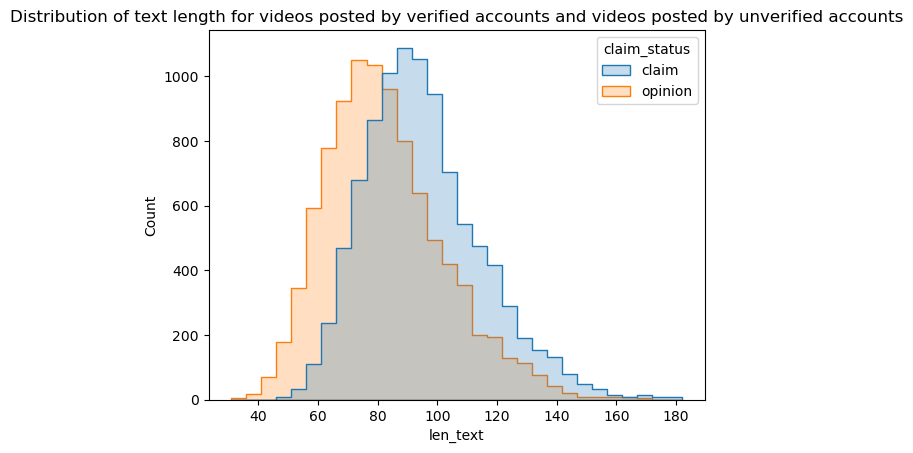

In [275]:
ax2 = sns.histplot(data=df, x='len_text', hue='claim_status', bins=30, kde=False, element="step", stat="count")
ply.title("Distribution of text length for videos posted by verified accounts and videos posted by unverified accounts")

## both claims and opinion has a normal distrution, they are slightly right skewed

In [353]:
## Variable Selection
X = df.copy()

X = X.drop(['#', 'video_id','video_transcription_text'], axis=1)


X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)

X = X.fillna(0)


X = X.astype(int)

X.head()               

C:\Users\alikr\AppData\Local\Temp\ipykernel_17356\1954901355.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length,len_text,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296,19425,241,1,0,97,97,0,0,1
1,1,32,140877,77355,19034,1161,684,107,107,0,0,0
2,1,31,902185,97690,2858,833,329,137,137,0,0,0
3,1,25,437506,239954,34812,1234,584,131,131,0,0,0
4,1,19,56167,34987,4110,547,152,128,128,0,0,0


In [357]:
## isolate y and x variables and split train and test sets

y = X['claim_status']

X = X.drop('claim_status', axis=1)


In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (11450, 11)
X_val shape: (3817, 11)
X_test shape: (3817, 11)


In [400]:
## RANDOM FOREST 
rf = RandomForestClassifier(random_state=0)

In [402]:
# GridSearchCV - hyperparameters to tune

cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [404]:
rf_val.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [405]:
rf_val.best_params_

{'max_depth': 7,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [406]:
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 10, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table


rf_cv_results = make_results('Random Forest CV', rf_val, metric = 'f1')
rf_cv_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.999475,0.990633,0.995033,0.995022


In [407]:
y_pred = rf_val.predict(X_test)

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

rf_test_scores = get_test_scores('Random Forest test', y_pred, y_test)
results = pd.concat([rf_cv_results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.999475,0.990633,0.995033,0.995022
0,Random Forest test,1.000000,0.991675,0.995820,0.995808


In [408]:
## XGBoost
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 



cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }


scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}



xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [409]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 300}

In [410]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table


xgb_cv_results = make_results('XGB CV',xgb_cv, metric = 'f1')
results = pd.concat([rf_cv_results, rf_test_scores,xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.999475,0.990633,0.995033,0.995022
0,Random Forest test,1.000000,0.991675,0.995820,0.995808
0,XGB CV,0.999298,0.988725,0.993981,0.993974


In [411]:
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.999475,0.990633,0.995033,0.995022
0,Random Forest test,1.000000,0.991675,0.995820,0.995808
0,XGB CV,0.999298,0.988725,0.993981,0.993974
0,XGB test,0.998950,0.990114,0.994513,0.994498


In [415]:
## model evaluation

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)


## Random forest evaluation

y_pred = rf_val.predict(X_val)

In [417]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

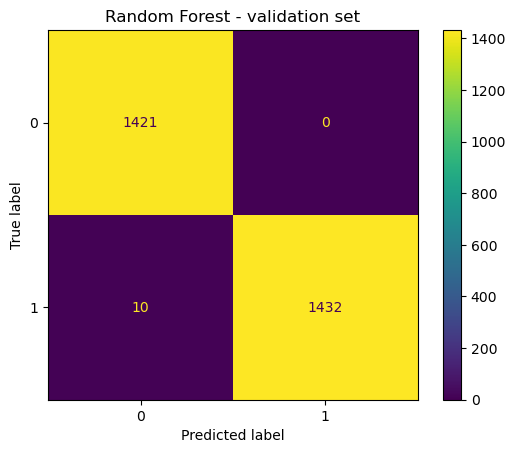

In [450]:
## creatring a confusion matrix

cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
disp.plot()
ply.title('Random Forest - validation set');
ply.show()

In [430]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1421
       claim       1.00      0.99      1.00      1442

    accuracy                           1.00      2863
   macro avg       1.00      1.00      1.00      2863
weighted avg       1.00      1.00      1.00      2863



In [432]:
## from the report above the Random forect model score were very good, the confusion matrix gave us only 10 miscallculations

In [442]:
## XGB Validation

y_pred_xgb = xgb_cv.predict(X_val)

y_pred_xgb

array([0, 0, 0, ..., 0, 1, 1])

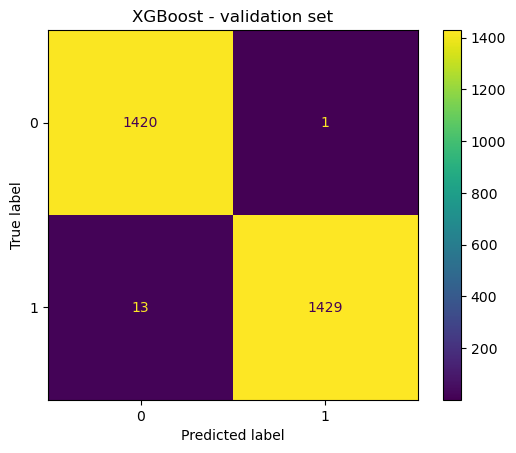

In [454]:
## creatring a confusion matrix

cm_xgb = confusion_matrix(y_val, y_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=None)
disp_xgb.plot()
ply.title('XGBoost - validation set')
ply.show()

In [446]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1421
       claim       1.00      0.99      1.00      1442

    accuracy                           1.00      2863
   macro avg       1.00      1.00      1.00      2863
weighted avg       1.00      1.00      1.00      2863



In [456]:
## Also XGB model is very good.

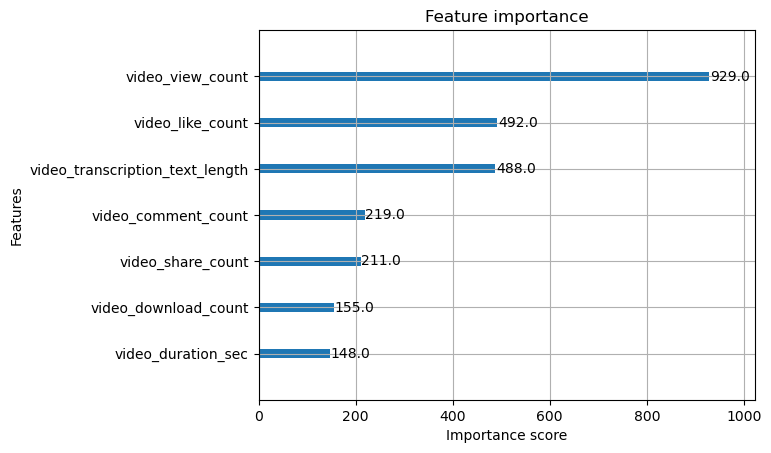

In [460]:
plot_importance(xgb_cv.best_estimator_);

In [ ]:
## i will reccomed the moedel because it preformed well on both validation and test. the model successfully classifies claims and opinions.
## since the model is almost perfect no need to feature engineer
## 